**Heart Disease Diagnostics**

*Introduction*

With the increasing environmental changes and rapid evolution, human bodies have become more prone and sensitive to deadly diseases than before. Being one of the most fatal conditions in the present world, cardiovascular disease refers to any disease that affects the cardiovascular system, including coronary heart disease, myocardial infarction or heart attack, stroke or cerebrovascular accident (CVA), vascular diseases, and/or peripheral arterial diseases.

*Objective*

The aim of this data science project focuses on determining the various health-related factors that are direct or indirect reasons for the increasing numbers of heart patients. By estabishing relations between various attributes, the project also provides a model that serves to detect heart diseases, which in turn can reduce the number of cases by predicting them in their early stages

*Health-related factors/Variables*

1. age = Age of the Patient
2. sex = Gender of the Patient ( 0: Male, 1: Female)
3. cp  =  4 types of chest pain (0:Typical Angina, 1:Atypical Angina, 2:Non-anginal pain, 3:Asymptomatic)
4. trestbps = resting blood pressure
5. chol = serum cholestoral in mg/dl
6. fbs = fasting blood sugar > 120 mg/dl
7. restecg = resting electrocardiographic results (values 0,1,2)
8. thalach = maximum heart rate achieved during a stress test
9. exang = exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. slope = the slope of the peak exercise ST segment
12. ca = number of major vessels (0-3) colored by flourosopy
13. thal = Thalium stress result 0:normal; 1:fixed defect; 2:reversable defect
14. target = 0: Normal, 1:Diseased

**1. Importing Libraries**

In [2]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore') 
import pickle

**2. Data Acquisition and Inspection**

In [3]:
#Dataset
df = pd.read_csv('Heart Disease data.csv')

In [4]:
#Changing the index beginning value from 0 to 1 to make the count proper
df.index = range(1, len(df) + 1)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1021,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1023,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1024,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1025,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 1 to 1025
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.shape

(1025, 14)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         8
61   1    0   148       203   0    1        161      0      0.0      2      1   3     0         4
              138       166   0    0        125      1      3.6      1      1   2     0         4
52   1    0   112       230   0    1        160      0      0.0      2      1   2     0         4
              125       212   0    1        168      0      1.0      2      2   3     0         4
                                                                                               ..
53   0    0   130       264   0    0        143      0      0.4      1      0   2     1         3
              138       234   0    0        160      0      0.0      2      0   2     1         3
          2   128       216   0    0        115      0      0.0      2      0   0     1         3
     1    0   142       2

*Observations:*

1. The dataset contains records of 1025 patients.
2. There are no null values in the dataset.
3. The mean age is 54 years, maximum is 77 and minimum is 29.
4. There are 13 determining factors or the x variable.
5. The continuous features include age, trestbps, chol,thalach and oldpeak
6. The categorical features include sex, cp, fbs, restecg, exang, slope, ca and thal.
7. The target column is the y variable.

**2. Data Preprocessing**

In [12]:
#Finding the number of unique values
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

*Observations*

1. There are no null values so data cleaning can be discarded.
2. The count of unique values in each feature has been retrieved.

**3. Exploratory Data Analysis**

EDA helps in visualizing the data and deriving accurate statistics to enhance our model.

In [13]:
#Depicts correlation between two variables
df_corr = df.corr()


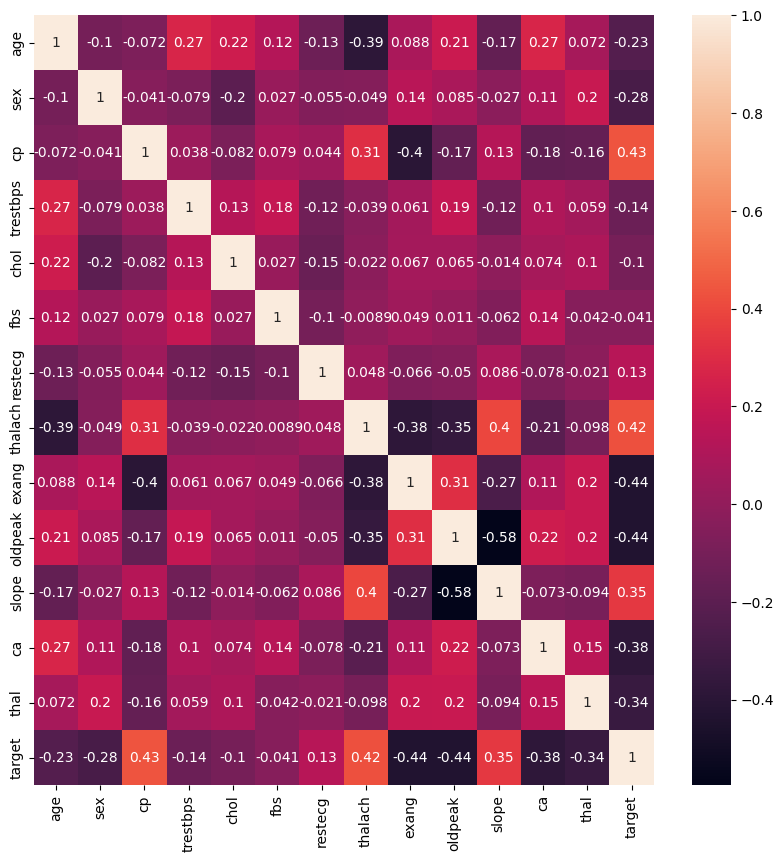

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_corr,annot=True)
plt.show()

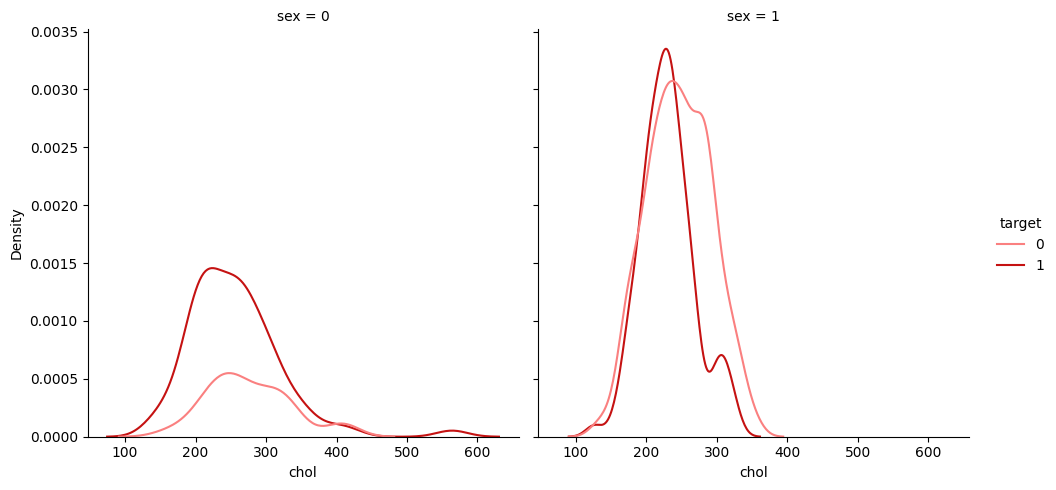

In [15]:
my_colors = { 1: "#c51212", 0:"#fa8080"}
sns.displot(data=df, x="chol", hue="target", col="sex", kind="kde" ,palette=my_colors)

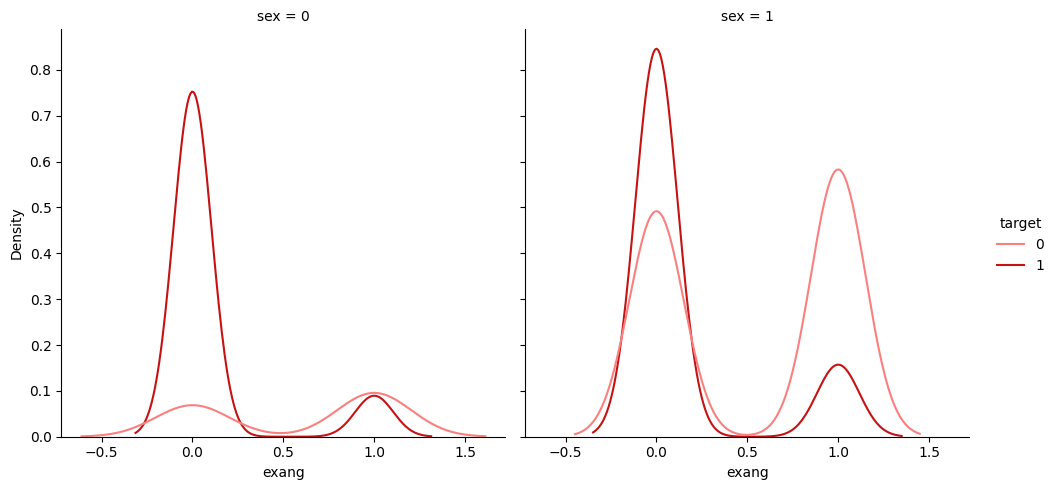

In [16]:
my_colors = { 1: "#c51212", 0:"#fa8080"}
sns.displot(data=df, x="exang", hue="target", col="sex", kind="kde",palette=my_colors)

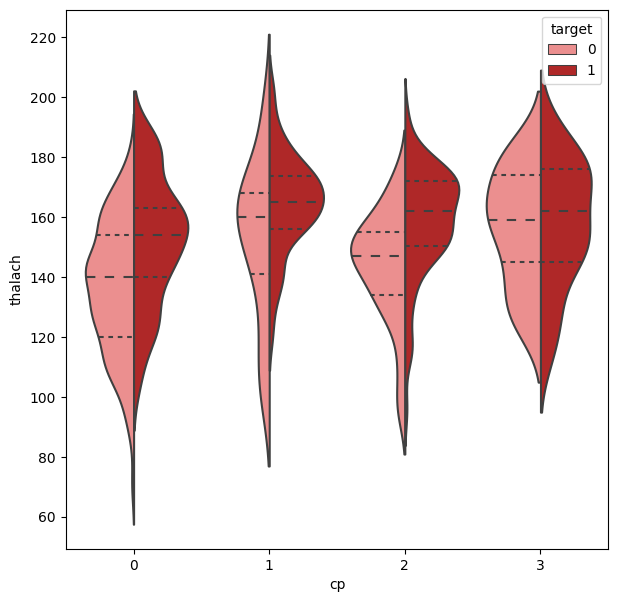

In [17]:
fig, ax = plt.subplots(figsize=(7,7))
my_colors = { 1: "#c51212", 0:"#fa8080"}
sns.violinplot(data=df, x="cp", y="thalach", hue="target", split=True, inner="quart", palette=my_colors)
plt.show()

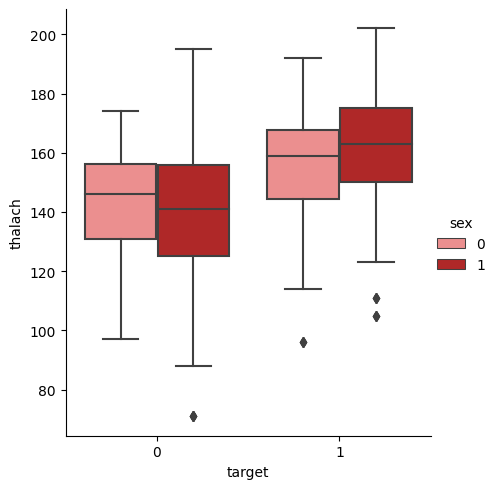

In [18]:
my_colors = { 1: "#c51212", 0:"#fa8080"}
sns.catplot(df, kind="box", x="target", y="thalach" ,hue="sex", aspect=0.9, palette=my_colors)

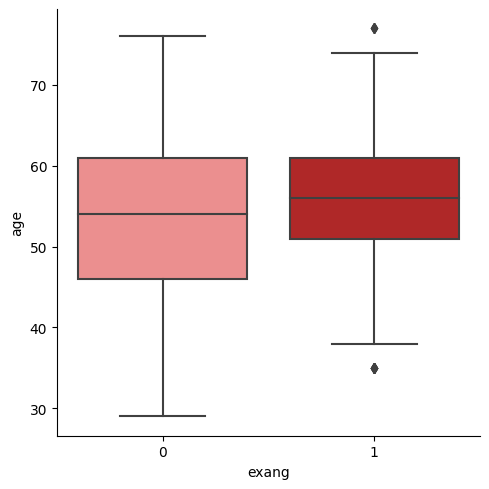

In [19]:
my_colors = { 1: "#c51212", 0:"#fa8080"}
sns.catplot(df,kind="box", x="exang", y="age", palette=my_colors)

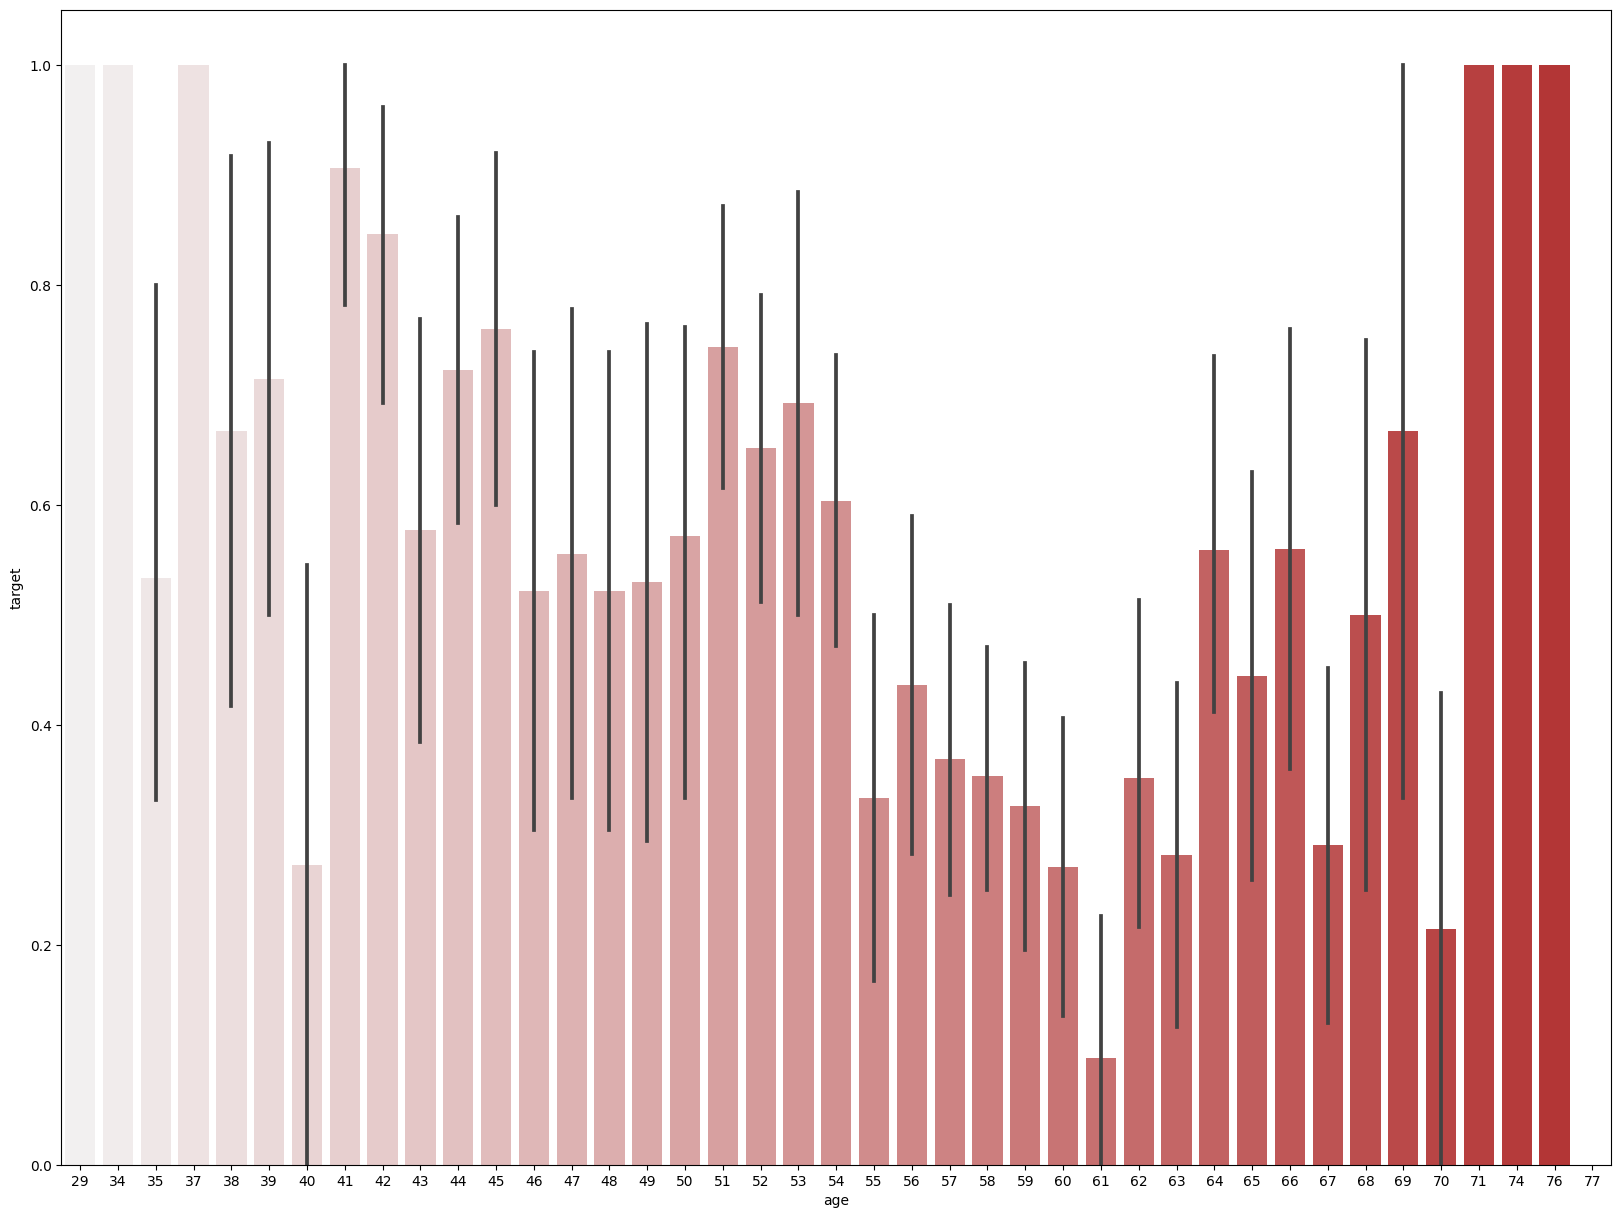

In [20]:
fig, ax = plt.subplots(figsize=(20,15))
sns.set_palette(sns.light_palette("#c51212", n_colors=43))
sns.barplot(data=df, x="age", y="target")
plt.show()

<Axes: xlabel='cp', ylabel='age'>

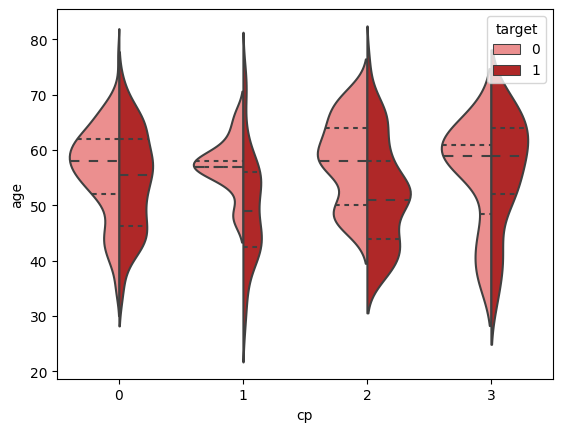

In [21]:
my_colors = { 1: "#c51212", 0:"#fa8080"}
sns.violinplot(data=df, x="cp", y="age", hue="target", split=True, inner="quart", palette=my_colors)

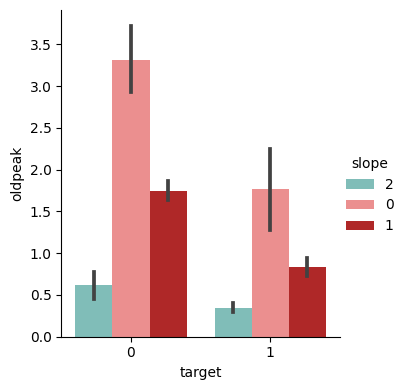

In [22]:
df['slope']= df['slope'].astype(str)
my_colors = { '0': "#fa8080", '1': "#c51212", '2': "#76c7c0" }
sns.catplot(df, kind="bar", x="target", y="oldpeak", hue="slope", height=4, aspect=0.9, palette=my_colors)
plt.show()

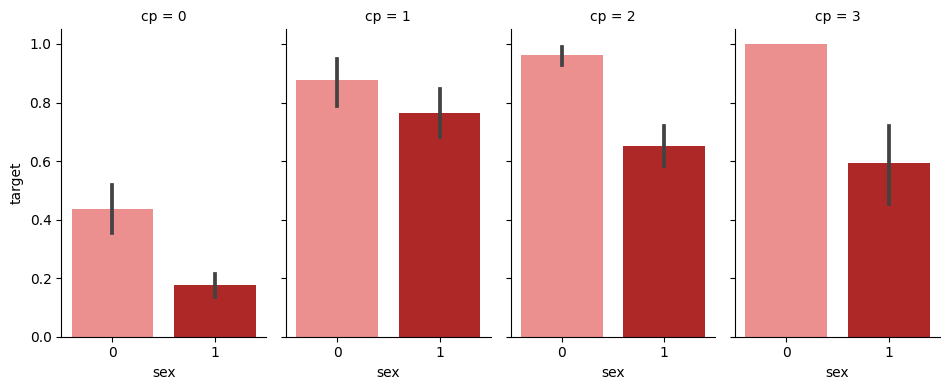

In [23]:
my_colors = { 1: "#c51212", 0:"#fa8080"}
sns.catplot(df, kind="bar",x="sex", y="target", col="cp", height=4, aspect=0.6, palette=my_colors)


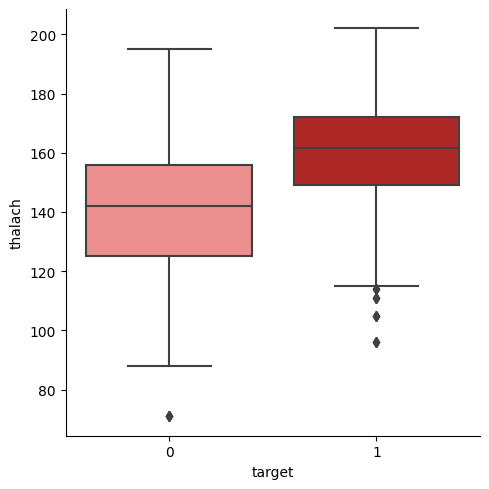

In [24]:
my_colors = { 1: "#c51212", 0:"#fa8080"}
sns.catplot(df, kind="box", x="target",y="thalach", height=5, palette=my_colors)

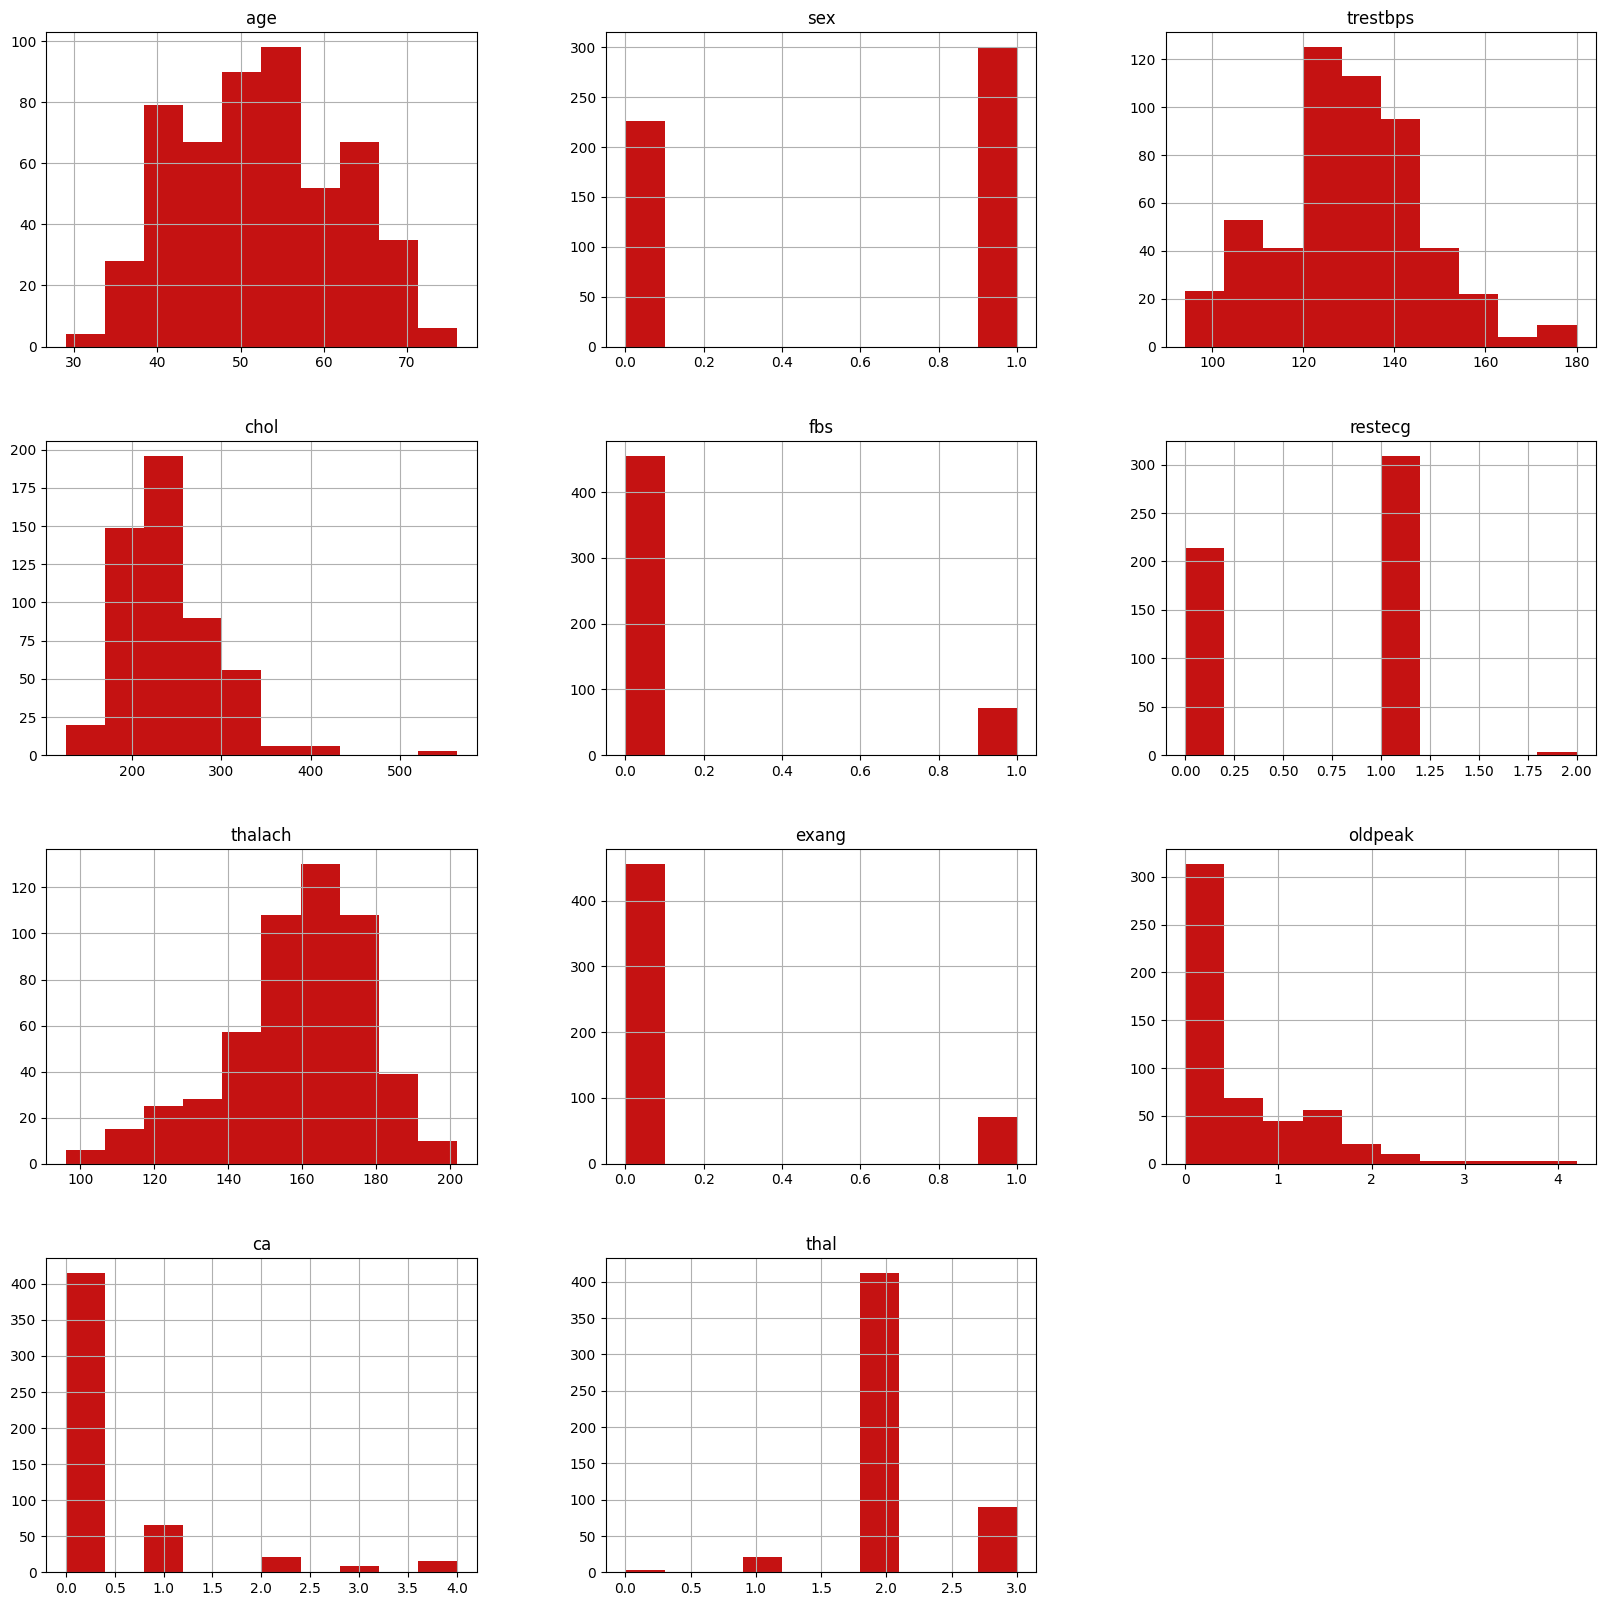

In [41]:
dfa= df[df['target']==1]
my_colors = ["#c51212"]
dfs=dfa.drop('target', axis=1)
histogram_df = dfs.hist(figsize=(20, 20), color=my_colors)

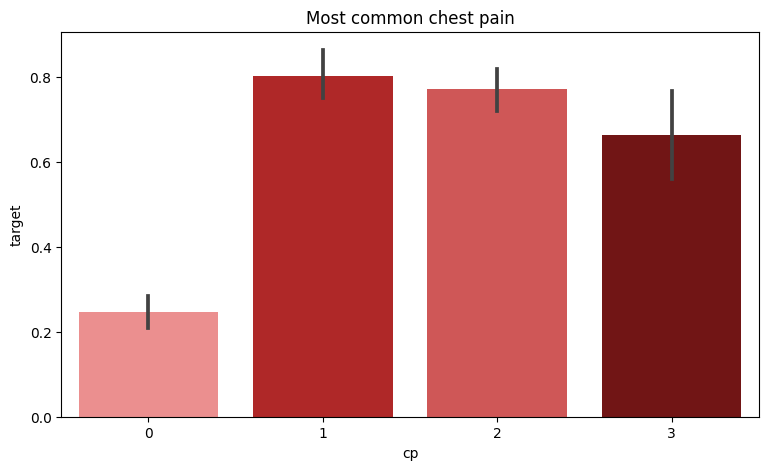

In [26]:
figure, ax = plt.subplots(figsize=(9,5))
df['cp'] = df['cp'].astype(str)
my_colors = { '0': "#fa8080", '1': "#c51212", '2': "#e34343", '3':"#800606"}
sns.barplot(df, x="cp", y="target", palette=my_colors)
plt.title('Most common chest pain')
plt.show()

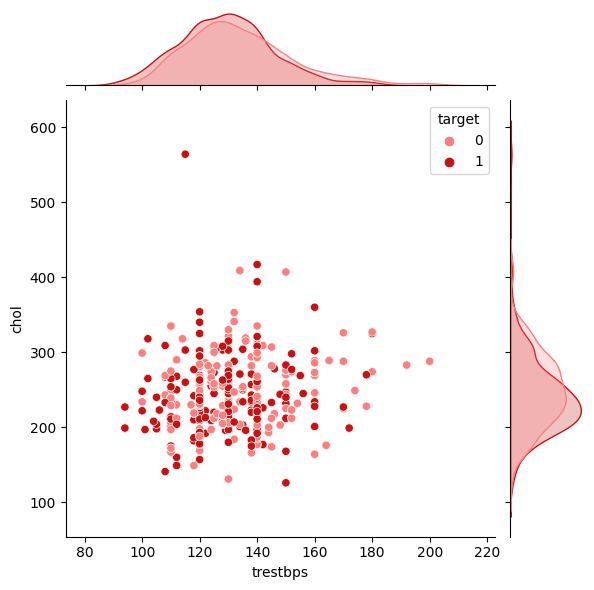

In [27]:
my_colors = { 1: "#c51212", 0:"#fa8080"}
sns.jointplot(df, x="trestbps",y="chol", hue="target", palette=my_colors)

*Observations*

Various Observations can be made:
1. Women with higher cholesterol are more prone to heart diseases when compared to men.
2. Atypical Angina is the most common chest pains out of the 4 types.
3. Patients with asymptomatic chest pain are most likely to have achieved a maximum heart rate during stress test.
4. Patients with Maximum Heart Rate achieved during a stress test between 150 and 170 are likely to have a heart disease.
5. Exercise Induced Angina is more common within the age range of 50-60.
6. Exercise Induced Angina is more in Women.

**4. Training the Model**

The dataset is split into two parts - one for training and the other for testing.

In [28]:
#x and y variables
x = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=35,test_size=0.3)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
238,57,1,1,124,261,0,1,141,0,0.3,2,0,3
710,45,1,3,110,264,0,1,132,0,1.2,1,0,3
828,57,1,2,128,229,0,0,150,0,0.4,1,1,3
668,57,1,1,124,261,0,1,141,0,0.3,2,0,3
622,48,1,0,130,256,1,0,150,1,0.0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,51,0,2,120,295,0,0,157,0,0.6,2,0,2
960,69,0,3,140,239,0,1,151,0,1.8,2,2,2
1005,51,0,2,140,308,0,0,142,0,1.5,2,1,2
34,70,1,2,160,269,0,1,112,1,2.9,1,1,3


**5. Fitting the Model**

We are going to try 4 different machine learning models. They are :
1. Logistic Regression
2. Support Vector Machine
3. Random Forest Classifier
4. K Nearest Neighbors

In [29]:
y_train.shape

(717,)

In [30]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()

In [31]:
model_types = {model1,model2,model3,model4}

Accuracy score is used to determine the model.

In [32]:
for model in model_types:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Model :", model)
    print("Accuracy Score :", accuracy_score(y_test,y_pred))

Model : KNeighborsClassifier()
Accuracy Score : 0.7077922077922078
Model : SVC()
Accuracy Score : 0.7045454545454546
Model : LogisticRegression()
Accuracy Score : 0.8311688311688312
Model : RandomForestClassifier()
Accuracy Score : 0.9772727272727273


Random Forest Classifier shows the highest accuracy rate. Hence this model is choosen.

In [33]:
coefficients = model3.feature_importances_
features = x_train.columns
for feature, coefficient in zip(features, coefficients):
    print("Feature:",feature,"Score:", coefficient)

Feature: age Score: 0.09479511142247057
Feature: sex Score: 0.03483961947640003
Feature: cp Score: 0.14377924625318467
Feature: trestbps Score: 0.07144565913707247
Feature: chol Score: 0.07343943928791813
Feature: fbs Score: 0.010204577572606278
Feature: restecg Score: 0.020047029085583746
Feature: thalach Score: 0.12033884640841794
Feature: exang Score: 0.054325055971595385
Feature: oldpeak Score: 0.10079497655913958
Feature: slope Score: 0.04199548344217433
Feature: ca Score: 0.1309782408967215
Feature: thal Score: 0.10301671448671533


In [34]:
roc_score = roc_auc_score(y_test,y_pred)
print("The ROC-AUC Score:",roc_score)

The ROC-AUC Score: 0.9770777876367936


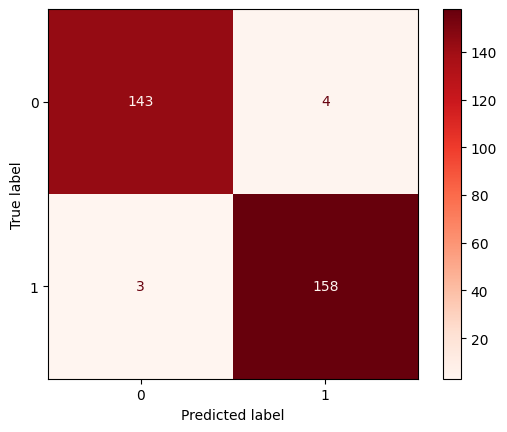

In [35]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [36]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       147
           1       0.98      0.98      0.98       161

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



**6. Testing**

In [37]:
#Choosing a random sample to test the model
x_new = x.sample(1)
x_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
229,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [53]:
#Creating an if condition to predict the model
answer = model4.predict(x_new)
if answer[0]==0:
    print("The person is not prone to a heart disease")
else:
    print("The person is prone to a heart disease")

The person is prone to a heart disease


**7. Feature Scaling**

Now, we will predict the most influential factors from the features.

In [39]:
coefficients = model3.feature_importances_
features = x_train.columns
for feature, coefficient in zip(features, coefficients):
    print("Feature:",feature,"Score:", coefficient)

Feature: age Score: 0.09479511142247057
Feature: sex Score: 0.03483961947640003
Feature: cp Score: 0.14377924625318467
Feature: trestbps Score: 0.07144565913707247
Feature: chol Score: 0.07343943928791813
Feature: fbs Score: 0.010204577572606278
Feature: restecg Score: 0.020047029085583746
Feature: thalach Score: 0.12033884640841794
Feature: exang Score: 0.054325055971595385
Feature: oldpeak Score: 0.10079497655913958
Feature: slope Score: 0.04199548344217433
Feature: ca Score: 0.1309782408967215
Feature: thal Score: 0.10301671448671533


Text(0.5, 1.0, 'The Top 5 Determining Features')

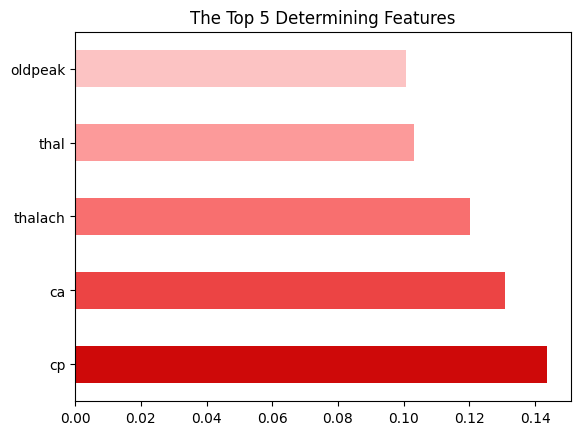

In [49]:
my_palette = [ "#ce0909","#ec4444", "#f86f6f", "#fc9a9a", "#fcc3c3"]
(pd.Series(model3.feature_importances_, index=x.columns)
   .nlargest(5)
   .plot(kind='barh', color=my_palette))
plt.title("The Top 5 Determining Features")

**8. Hyperparameter Tuning**

Hyperparameter tuning helps us to control the model features and performance. It helps in increasing the efficiency of the model and providing optimal results.

In [50]:
param_grid = {
    'n_estimators':[50,100,150],
    'max_depth':['sqrt', 'log2', None],
    'min_samples_split':[3,6,9],
    'min_samples_leaf':[3,6,9]
}


In [51]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)

In [52]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': ['sqrt', 'log2', None],
                         'min_samples_leaf': [3, 6, 9],
                         'min_samples_split': [3, 6, 9],
                         'n_estimators': [50, 100, 150]})

In [54]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150}

In [55]:
bestmodel = grid_search.best_estimator_
y_pred = bestmodel.predict(x_test)

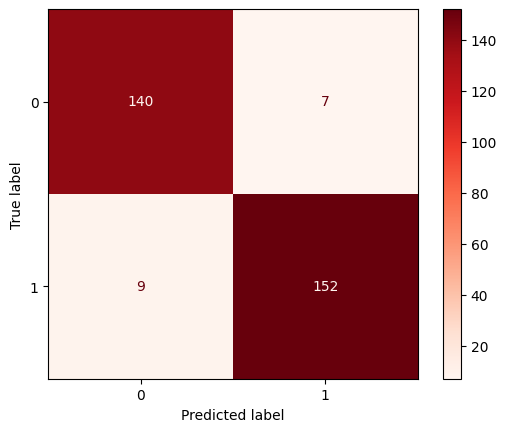

In [56]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [57]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       147
           1       0.96      0.94      0.95       161

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



**Conclusion**

Various conclusions can be made from the analysis:
1. Out of the 13 attributes that determine the target attribute, chest pain type (cp), number of major vessels (ca), maximum heart rate achieved during stress test (thalach), Thalium stress result (thal) and ST depression induced by exercise (oldpeak) prove to be the most influential factors.
2. The Random Forest Classifier Model has shown the highest accuracy with a score of 0.977, hence this model was choosen to experiment.
3. This heart disease diagnosis model can be used for various predictive analysis to obtain maximum accurate results.